# Project Theme: 

Theme Classification or Summarization for Customer Review Comment

# Problem: 

Receive many customer review from Amazon daily and need to understand the main idea or theme from long text comment

# Data Source & Data Gathered: 

Customer Comment from Amazon.com

Data gathered: Latest customer review comment data from 2017 to 2022 YTD

# Data processing:

Reviewed 2022 YTD data and already classified all customer comment to below 5 theme for model training data:

- 0 = Product Design (Function/ Comfortability/ Material)
- 1 = Durability
- 2 = Assembly or Installation
- 3 = Pricing/ Value of Money
- 4 = Shipping/ Logistic/ Packaging

# Data Cleaning:

Using Pandas for below data cleaning task

- Drop unnecessary column

- Remove Data with no comment

- Remove Data with no label

- Remove duplicate comment/ data as variant aproducts under same collection is sharing same comment

- Remove duplicate comment/ data as data is capturing latest comment daily and it will repeat the same comment if no new comment in daily data

- Remove blank comment and comment not related to above 5 themes from training data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import the Data

df_2022 = pd.read_csv('Project Data/Export Amazon Product Data-2022.csv')

In [3]:
df_2022

,Customer ID,Style,Parent/Child,Parent SKU,Child SKU,Listing Product Name,Listing SKU,Amazon Sell Price,Sell Price,Avg Rating,...,Sold by Seller 1,Other Price 2,Sold by Seller 2,Other Price 3,Sold by Seller 3,Latest Review Rating,Latest Review Comment,Latest Review Date,UpdateDate,Label
0,AMAZ10,10HGQ,Parent,10HGQ,NaN,Dream Pro Restore 10 Inch Gel-Infused Queen Me...,B00RGICVIS,No Amazon Sell Price,NaN,4.5,...,NaN,NaN,NaN,NaN,NaN,5.0,This is my third memory foam mattress and I re...,12/20/2015 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
1,AMAZ10,127700033,Parent,127700033,UPH2001267,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y17K8CD,No Amazon Sell Price,NaN,2.9,...,NaN,NaN,NaN,NaN,NaN,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
2,AMAZ10,127701533,Parent,127701533,UPH2001268,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y19JZGK,885.47,885.47,2.9,...,NaN,NaN,NaN,NaN,NaN,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
3,AMAZ10,127701633,Parent,127701633,UPH2001271,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06XZTDCG4,No Amazon Sell Price,NaN,2.9,...,NaN,NaN,NaN,NaN,NaN,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
4,AMAZ10,127701733,Parent,127701733,UPH2001269,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06XZVJG4C,No Amazon Sell Price,NaN,2.9,...,NaN,NaN,NaN,NaN,NaN,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65776,AMAZ10,YFT4349D,Parent,YFT4349D,NaN,Serta Harmon Square Arm Reversible Sectional S...,B07WS25Z45,No Amazon Sell Price,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,5.0,So let me start by saying I have never left a ...,12/2/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...
65777,AMAZ10,YFT4349E,Parent,YFT4349E,NaN,Serta Harmon Rolled Arm Reversible Sectional S...,B07WP6FJPQ,No Amazon Sell Price,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,5.0,So let me start by saying I have never left a ...,12/2/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...
65778,AMAZ10,YFT4349F,Parent,YFT4349F,NaN,Serta Harmon Rolled Arm Reversible Sectional S...,B07WV5QLQ2,No Amazon Sell Price,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,5.0,So let me start by saying I have never left a ...,12/2/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...
65779,AMAZ10,YFT4349G,Parent,YFT4349G,NaN,Serta Harmon Rolled Arm Reversible Sectional S...,B07WS25Z3Z,No Amazon Sell Price,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,5.0,So let me start by saying I have never left a ...,12/2/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...


In [4]:
# Retrieve all columns header
df_2022.columns

Index(['Customer ID', 'Style', 'Parent/Child', 'Parent SKU', 'Child SKU',
       'Listing Product Name', 'Listing SKU', 'Amazon Sell Price',
       'Sell Price', 'Avg Rating', 'Num Reviews', 'Color', 'In Stock',
       'Quantity', 'URL', 'Size', 'Seller - Buy Box', 'Other Price 1',
       'Sold by Seller 1', 'Other Price 2', 'Sold by Seller 2',
       'Other Price 3', 'Sold by Seller 3', 'Latest Review Rating',
       'Latest Review Comment', 'Latest Review Date', 'UpdateDate', 'Label'],
      dtype='object')

In [5]:
# Drop unnecessary columns and save to new df_train
df_2022=df_2022[["Customer ID","Style","Parent SKU","Listing Product Name","Listing SKU",
                      "Avg Rating", "Num Reviews","Latest Review Rating",
                      "Latest Review Comment", "Latest Review Date", "UpdateDate", "Label"]]

In [6]:
df_2022

,Customer ID,Style,Parent SKU,Listing Product Name,Listing SKU,Avg Rating,Num Reviews,Latest Review Rating,Latest Review Comment,Latest Review Date,UpdateDate,Label
0,AMAZ10,10HGQ,10HGQ,Dream Pro Restore 10 Inch Gel-Infused Queen Me...,B00RGICVIS,4.5,6.0,5.0,This is my third memory foam mattress and I re...,12/20/2015 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
1,AMAZ10,127700033,127700033,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y17K8CD,2.9,4.0,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
2,AMAZ10,127701533,127701533,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y19JZGK,2.9,5.0,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
3,AMAZ10,127701633,127701633,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06XZTDCG4,2.9,4.0,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
4,AMAZ10,127701733,127701733,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06XZVJG4C,2.9,5.0,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...
...,...,...,...,...,...,...,...,...,...,...,...,...
65776,AMAZ10,YFT4349D,YFT4349D,Serta Harmon Square Arm Reversible Sectional S...,B07WS25Z45,4.0,176.0,5.0,So let me start by saying I have never left a ...,12/2/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...
65777,AMAZ10,YFT4349E,YFT4349E,Serta Harmon Rolled Arm Reversible Sectional S...,B07WP6FJPQ,4.0,176.0,5.0,So let me start by saying I have never left a ...,12/2/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...
65778,AMAZ10,YFT4349F,YFT4349F,Serta Harmon Rolled Arm Reversible Sectional S...,B07WV5QLQ2,4.0,176.0,5.0,So let me start by saying I have never left a ...,12/2/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...
65779,AMAZ10,YFT4349G,YFT4349G,Serta Harmon Rolled Arm Reversible Sectional S...,B07WS25Z3Z,4.0,176.0,5.0,So let me start by saying I have never left a ...,12/2/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...


In [7]:
# Check null value
df_2022.isnull().sum()

Customer ID                  0
Style                        0
Parent SKU                  11
Listing Product Name         0
Listing SKU                  0
Avg Rating               11187
Num Reviews              11187
Latest Review Rating     17197
Latest Review Comment    17300
Latest Review Date       17197
UpdateDate                   0
Label                    24356
dtype: int64

In [8]:
df_2022["Label"].value_counts()

Product Design (Function/ Comfortability/ Material)    23964
Assembly or Installation                                7537
Shipping/ Logistic/ Packaging                           4355
Durability                                              3204
Pricing/ Value of Money                                 2365
Name: Label, dtype: int64

In [9]:
# Data with blank Comment and label
df_2022=df_2022.dropna(subset=["Label"])

In [10]:
df_2022.shape

(41425, 12)

In [11]:
# Check any duplicated comment as shared comment and daily data structure
df_2022["Latest Review Comment"].duplicated().sum()

40778

In [12]:
# Drop all duplicated comment
df_reviews=df_2022.drop_duplicates(subset = ["Latest Review Comment"])

In [13]:
df_reviews["Latest Review Comment"].duplicated().sum()

0

In [14]:
df_reviews.reset_index(drop=True,inplace=True)

In [15]:
# Data set without any duplicate value; Cross checked with Excel
df_reviews.shape

(647, 12)

In [16]:
# apply numeric value to respresent label as Y for model training

df_reviews["Label_value"]=df_reviews["Label"].apply(lambda x:  0 if x =="Product Design (Function/ Comfortability/ Material)" else
                                                          (1 if x =="Durability" else
                                                          (2 if x =="Assembly or Installation" else
                                                          (3 if x =="Pricing/ Value of Money" else 4)))                                                                                                                     
                                                                                        )

<ipython-input-16-fb37f60d547d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["Label_value"]=df_reviews["Label"].apply(lambda x:  0 if x =="Product Design (Function/ Comfortability/ Material)" else


In [17]:
df_reviews

,Customer ID,Style,Parent SKU,Listing Product Name,Listing SKU,Avg Rating,Num Reviews,Latest Review Rating,Latest Review Comment,Latest Review Date,UpdateDate,Label,Label_value
0,AMAZ10,10HGQ,10HGQ,Dream Pro Restore 10 Inch Gel-Infused Queen Me...,B00RGICVIS,4.5,6.0,5.0,This is my third memory foam mattress and I re...,12/20/2015 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0
1,AMAZ10,127700033,127700033,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y17K8CD,2.9,4.0,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0
2,AMAZ10,127701533,127701533,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y19JZGK,2.9,5.0,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0
3,AMAZ10,127711133,127711133,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y1B1B2T,3.5,9.0,5.0,This sofa is very sturdy and attractive. I lov...,2/5/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0
4,AMAZ10,129701233,129701233,Serta Hemsley Contemporary Upholstered Sofa wi...,B06XPRXRJ4,2.9,4.0,1.0,Purchased 2 of these sofas. The foam cushions ...,4/21/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,AMAZ10,45833,45833,La-Z-Boy Delano Big & Tall Executive Office Ch...,B0116W5B5O,4.1,1557.0,1.0,I've had the chair for about 6 months. I'm hea...,12/21/2021 0:00,1/1/2022 0:00,Durability,1
643,AMAZ10,47925,47925,"Serta Leighton Home Office Memory Foam, Height...",B01IR8U42K,4.4,1604.0,1.0,Terrible quality. No memory foam anywhere in t...,12/25/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0
644,AMAZ10,CR43528PB,CR43528PB,"Serta Copenhagen 61"" Loveseat - Pillowed Back ...",B00EUU5JI4,3.4,2203.0,1.0,It looks great in the picture but it's NOT com...,12/30/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0
645,AMAZ10,FUTB10102A,FUTB10102A,Finch Lockwood Modern 2-Tier Wood Campaign Sid...,B07Q3V22SC,3.8,29.0,1.0,"Surface has multiple globs of wood filler, not...",7/27/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0


# Basic Data Exploration

Basic Table to show Label distribution

Plot the pie chart

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

### All Label

In [19]:
dist=df_reviews.groupby("Label").agg({"Latest Review Comment": "count"}).reset_index().sort_values(by=["Latest Review Comment"],ascending=False)

In [20]:
dist

,Label,Latest Review Comment
3,Product Design (Function/ Comfortability/ Mate...,372
0,Assembly or Installation,117
4,Shipping/ Logistic/ Packaging,62
1,Durability,57
2,Pricing/ Value of Money,39


In [21]:
total_of_counts=dist["Latest Review Comment"].sum()
total_of_counts

647

In [22]:
def autopct_format(prct_value):
    return '{:.1f}%\n{:.0f}'.format(prct_value, total_of_counts*prct_value/100)

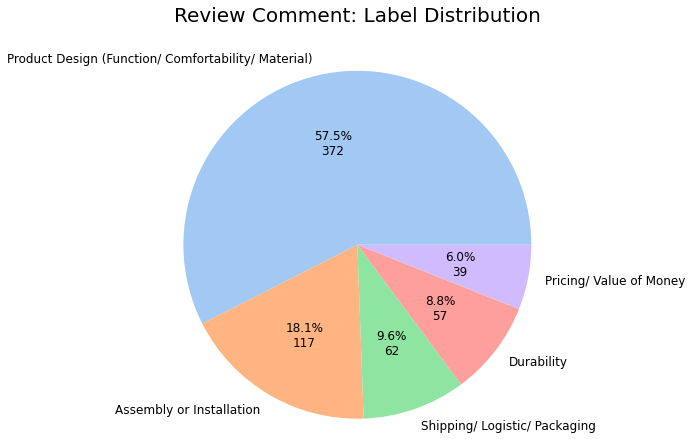

In [23]:
# Pie Chart for Label
data = dist["Latest Review Comment"]
labels=dist["Label"]
colors = sns.color_palette('pastel')
plt.title('Review Comment: Label Distribution',y=1.5,fontsize = 20)
plt.pie(data, colors = colors,labels=labels,autopct = autopct_format,radius=2,textprops={'fontsize': 12})
plt.show()

### Most comment related to Product Design ~60%

### Further Drill down for each Label

#### Product Design (Function/ Comfortability/ Material)

In [24]:
df_reviews_Product_Design = df_reviews.loc[df_reviews["Label"]=="Product Design (Function/ Comfortability/ Material)"]

In [25]:
df_reviews_Product_Design.shape

(372, 13)

In [26]:
dist_Product_Design=df_reviews_Product_Design.groupby(["Latest Review Rating"]).agg({"Latest Review Comment": "count"}).reset_index().sort_values(by=["Latest Review Comment"],ascending=False)

In [27]:
dist_Product_Design

,Latest Review Rating,Latest Review Comment
4,5.0,157
0,1.0,71
3,4.0,53
2,3.0,46
1,2.0,45


In [28]:
total_of_counts=dist_Product_Design["Latest Review Comment"].sum()
total_of_counts

372

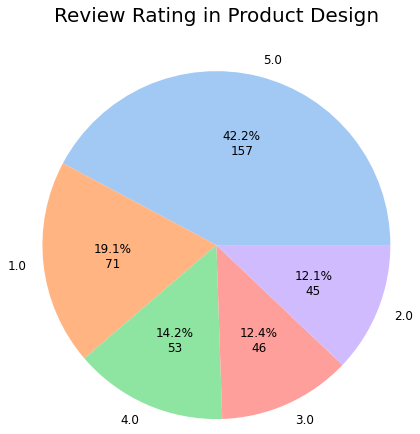

In [29]:
# Most comment related to Product Design > 50%
data = dist_Product_Design["Latest Review Comment"]
labels=dist_Product_Design["Latest Review Rating"]
colors = sns.color_palette('pastel')
plt.title('Review Rating in Product Design',y=1.5,fontsize = 20)
plt.pie(data, colors = colors,labels=labels,autopct = autopct_format,radius=2,textprops={'fontsize': 12})
plt.show()

#### Customers is satisfied on Product Design (Higher % on high Rating while >40% customers rated 5)

#### Assembly

In [30]:
df_reviews_Assembly= df_reviews.loc[df_reviews["Label"]=="Assembly or Installation"]

In [31]:
df_reviews_Assembly.shape

(117, 13)

In [32]:
dist_Assembly=df_reviews_Assembly.groupby(["Latest Review Rating"]).agg({"Latest Review Comment": "count"}).reset_index().sort_values(by=["Latest Review Comment"],ascending=False)

In [33]:
dist_Assembly

,Latest Review Rating,Latest Review Comment
4,5.0,65
0,1.0,23
3,4.0,17
1,2.0,7
2,3.0,5


In [34]:
total_of_counts=dist_Assembly["Latest Review Comment"].sum()
total_of_counts

117

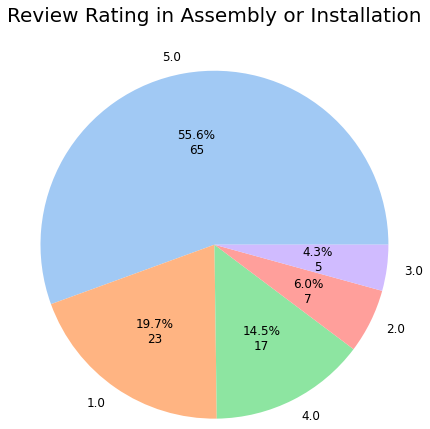

In [35]:
data = dist_Assembly["Latest Review Comment"]
labels=dist_Assembly["Latest Review Rating"]
colors = sns.color_palette('pastel')
plt.title('Review Rating in Assembly or Installation',y=1.5,fontsize = 20)
plt.pie(data, colors = colors,labels=labels,autopct = autopct_format,radius=2,textprops={'fontsize': 12})
plt.show()

#### Customers is satisfied on Assembly (Higher % on high Rating while >55% customers rated 5)

#### Shipping

In [36]:
df_reviews_Shipping= df_reviews.loc[df_reviews["Label"]=="Shipping/ Logistic/ Packaging"]

In [37]:
df_reviews_Shipping.shape

(62, 13)

In [38]:
dist_Shipping=df_reviews_Shipping.groupby(["Latest Review Rating"]).agg({"Latest Review Comment": "count"}).reset_index().sort_values(by=["Latest Review Comment"],ascending=False)

In [39]:
dist_Shipping

,Latest Review Rating,Latest Review Comment
0,1.0,29
1,2.0,16
2,3.0,9
3,4.0,4
4,5.0,4


In [40]:
total_of_counts=dist_Shipping["Latest Review Comment"].sum()
total_of_counts

62

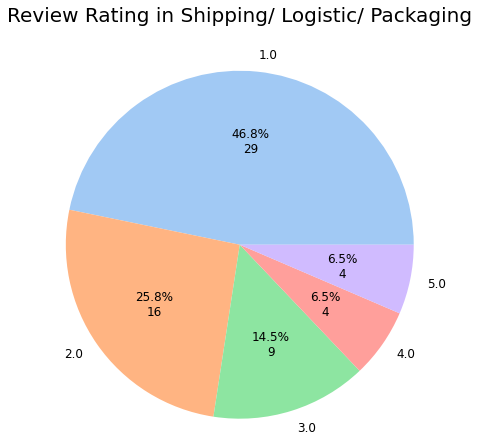

In [41]:
data = dist_Shipping["Latest Review Comment"]
labels=dist_Shipping["Latest Review Rating"]
colors = sns.color_palette('pastel')
plt.title('Review Rating in Shipping/ Logistic/ Packaging',y=1.5,fontsize = 20)
plt.pie(data, colors = colors,labels=labels,autopct = autopct_format,radius=2,textprops={'fontsize': 12})
plt.show()

#### Customers is NOT satisfied on Shipping (Higher % on Low Rating while ~70% customers rated 1 or 2)

#### Durability

In [42]:
df_reviews_Durability = df_reviews.loc[df_reviews["Label"]=="Durability"]

In [43]:
df_reviews_Durability.shape

(57, 13)

In [44]:
dist_Durability=df_reviews_Durability.groupby(["Latest Review Rating"]).agg({"Latest Review Comment": "count"}).reset_index().sort_values(by=["Latest Review Comment"],ascending=False)

In [45]:
dist_Durability

,Latest Review Rating,Latest Review Comment
0,1.0,31
1,2.0,13
2,3.0,8
4,5.0,3
3,4.0,2


In [46]:
total_of_counts=dist_Durability["Latest Review Comment"].sum()
total_of_counts

57

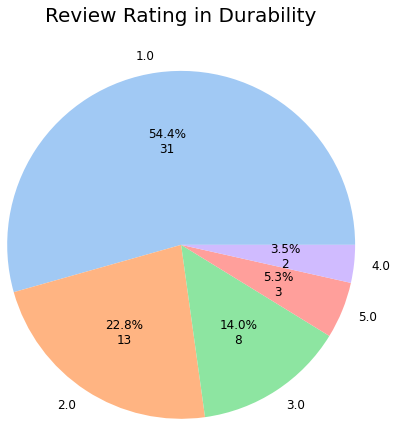

In [47]:
data = dist_Durability["Latest Review Comment"]
labels=dist_Durability["Latest Review Rating"]
colors = sns.color_palette('pastel')
plt.title('Review Rating in Durability',y=1.5,fontsize = 20)
plt.pie(data, colors = colors,labels=labels,radius=2,autopct=autopct_format,textprops={'fontsize': 12})
plt.show()

#### Customers is NOT satisfied on Durability (Higher % on Low Rating while ~70% customers rated 1 or 2)

#### Pricing

In [48]:
df_reviews_Pricing= df_reviews.loc[df_reviews["Label"]=="Pricing/ Value of Money"]

In [49]:
df_reviews_Pricing.shape

(39, 13)

In [50]:
dist_Pricing=df_reviews_Pricing.groupby(["Latest Review Rating"]).agg({"Latest Review Comment": "count"}).reset_index().sort_values(by=["Latest Review Comment"],ascending=False)

In [51]:
dist_Pricing

,Latest Review Rating,Latest Review Comment
4,5.0,16
1,2.0,7
3,4.0,7
2,3.0,5
0,1.0,4


In [52]:
total_of_counts=dist_Pricing["Latest Review Comment"].sum()
total_of_counts

39

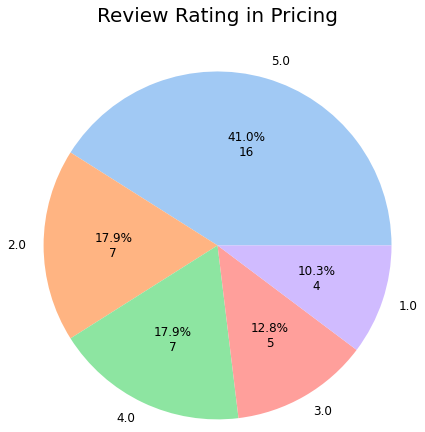

In [53]:
data = dist_Pricing["Latest Review Comment"]
labels=dist_Pricing["Latest Review Rating"]
colors = sns.color_palette('pastel')
plt.title('Review Rating in Pricing',y=1.5,fontsize = 20)
plt.pie(data, colors = colors,labels=labels,autopct = autopct_format,radius=2,textprops={'fontsize': 12})
plt.show()

#### Customers is  satisfied on Pricing (Higher % on High Rating while ~40% customers rated 5)

In [54]:
# What next?
# Use NLP to identity key words?
# Topic Modelling
# Reference: https://www.youtube.com/watch?v=aPMPyUoFH8U

# Question:
# 1) Really need to drop columns in training dataset
# 2) After Model trained, do we still need to remove duplicatue comment?
# 3) As comment data is retrieved daily, do I need to ensure test or new data did not include to training data?
# 4) As it is Amazon data struture only, do I need to modify other customer data as same data structure?

# Text Processing - BOW

In [55]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ethanchan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ethanchan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
# Get English Stopwords
eng_stopwords = stopwords.words("english")

In [57]:
#eng_stopwords

In [58]:
# Get Punctuation 
punctuation_list = list(string.punctuation)

In [59]:
#punctuation_list

In [60]:
# Testing on Snowball stemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
print(stemmer.stem("comfortable"))
print(stemmer.stem("comforty"))
print(stemmer.stem("better"))
print(stemmer.stem("easy"))
print(stemmer.stem("easier"))
print(stemmer.stem("quality"))

comfort
comforti
better
easi
easier
qualiti


In [61]:
# Testing on WordNetLemmatizer 
from nltk.stem import WordNetLemmatizer
wn=WordNetLemmatizer()

print(wn.lemmatize("comfortable",pos="n"))
print(wn.lemmatize("comfortable",pos="a"))
print(wn.lemmatize("comfortable",pos="v"))
print(wn.lemmatize("comforty",pos="n"))
print(wn.lemmatize("comforty",pos="a"))
print(wn.lemmatize("comforty",pos="v"))
print(wn.lemmatize("better",pos="n"))
print(wn.lemmatize("better",pos="a"))
print(wn.lemmatize("better",pos="v"))
print(wn.lemmatize("easier",pos="n"))
print(wn.lemmatize("easier",pos="a"))
print(wn.lemmatize("easier",pos="v"))
print(wn.lemmatize("quality",pos="n"))
print(wn.lemmatize("quality",pos="a"))
print(wn.lemmatize("quality",pos="v"))

comfortable
comfortable
comfortable
comforty
comforty
comforty
better
good
better
easier
easy
easier
quality
quality
quality


### As we need keyword in complete and easy to understand, so will use Lemmatizer instead of stemmer

In [62]:
def token_filter(text):
    eng_stopwords = stopwords.words("english")
    punctuation_list = list(string.punctuation)
    wn=WordNetLemmatizer()
    custom_list = ["wa", "ha", "le", "ca", "v", "lol", "tl", "w"]
    
    ### Tokenize sentence
    text_list = word_tokenize(text)
    text_list = [re.sub(r'\W+', '', i.lower()) for i in text_list if i.isalpha()]
    
    
    ### lemmatize all word
    
    #lemmatize NN (Noun, singular or mass)
    text_list = [wn.lemmatize(word, pos="n") for word in text_list]
    
    #lemmatize JJ (Adjective)
    text_list = [wn.lemmatize(word, pos="a") for word in text_list]

    #lemmatize VB (Verb, base form)
    text_list = [wn.lemmatize(word, pos="v") for word in text_list]
    
      
    filter_list = eng_stopwords + punctuation_list + custom_list
    ### Filter stopwords and Punctuations
    text_list = [i for i in text_list if i not in filter_list]
    return text_list
    ### return filtered list

In [63]:
#test for token_filter function
token_filter("I am Gawain and I am teaching Python class, better, good, geese")


['gawain', 'teach', 'python', 'class', 'good', 'good', 'goose']

In [64]:
token_filter(df_reviews["Latest Review Comment"][12])

['chair',
 'size',
 'much',
 'small',
 'mention',
 'dimension',
 'base',
 'seat',
 'wide',
 'deep',
 'back',
 'chair',
 'height',
 'base',
 'seat',
 'overall',
 'height',
 'floor',
 'barely',
 'fully',
 'raise',
 'low',
 'height',
 'floor',
 'chair',
 'provide',
 'head',
 'support',
 'chair',
 'back',
 'reach',
 'shoulder',
 'sit',
 'look',
 'executive',
 'chair',
 'head',
 'support',
 'go',
 'different',
 'chair',
 'height',
 'around',
 'chair',
 'comfortable',
 'plush',
 'leather',
 'pad',
 'easy',
 'assemble',
 'tool',
 'screw',
 'need',
 'assembly',
 'include',
 'chair']

# BOW for all comment

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = token_filter)

In [66]:
X = df_reviews["Latest Review Comment"]
X_bow = vectorizer.fit_transform(X)

In [67]:
count_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names())

In [68]:
BOW=count_df.T.sum(axis=1).reset_index().sort_values(by=0, ascending =False)

In [69]:
BOW

,index,0
312,chair,641
1174,look,234
154,back,222
380,comfortable,171
2333,would,171
...,...,...
1583,proud,1
1584,prove,1
695,espresso,1
693,error,1


In [70]:
BOW.columns=["Word", "Word Count"]

In [71]:
BOW

,Word,Word Count
312,chair,641
1174,look,234
154,back,222
380,comfortable,171
2333,would,171
...,...,...
1583,proud,1
1584,prove,1
695,espresso,1
693,error,1


In [72]:
BOW.to_csv("Project Result/BOW.csv", index = False)

C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 25 Words')

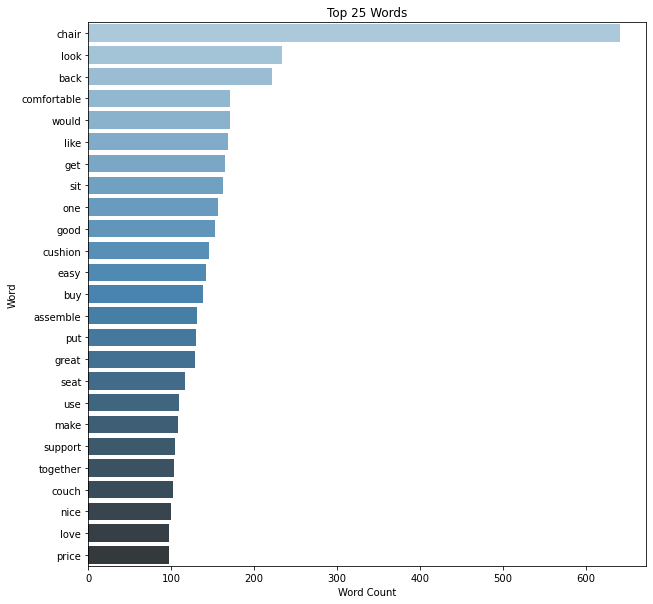

In [73]:
top25 = BOW.iloc[0:25]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top25, palette="Blues_d").set_title("Top 25 Words")

## Removed some meaningless word ie: wa, ha, le, ca, v, lol, tl, w from function and re-run

# BOW for label = Product Design (Function/ Comfortability/ Material)

In [74]:
X_Product_Design = df_reviews_Product_Design["Latest Review Comment"]
X_bow_Product_Design = vectorizer.fit_transform(X_Product_Design)

In [75]:
count_df = pd.DataFrame(X_bow_Product_Design.toarray(), columns=vectorizer.get_feature_names())

In [76]:
BOW_Product_Design=count_df.T.sum(axis=1).reset_index().sort_values(by=0, ascending =False)

In [77]:
BOW_Product_Design.columns=["Word", "Word Count"]

In [78]:
BOW_Product_Design

,Word,Word Count
240,chair,421
117,back,170
902,look,156
1414,sit,129
298,comfortable,129
...,...,...
1184,pose,1
501,ei,1
1186,possession,1
1187,possibility,1


In [79]:
BOW_Product_Design.to_csv("Project Result/BOW_Product_Design.csv", index = False)

C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Product Design')

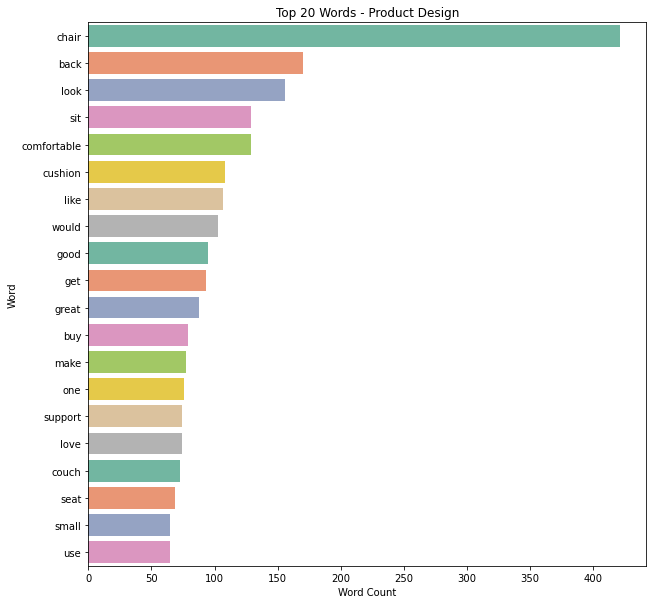

In [80]:
top20 = BOW_Product_Design.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Product Design")

# BOW for label = Durability

In [81]:
X_Durability = df_reviews_Durability["Latest Review Comment"]
X_bow_Durability = vectorizer.fit_transform(X_Durability)

In [82]:
count_df = pd.DataFrame(X_bow_Durability.toarray(), columns=vectorizer.get_feature_names())

In [83]:
BOW_Durability=count_df.T.sum(axis=1).reset_index().sort_values(by=0, ascending =False)

In [84]:
BOW_Durability.columns=["Word", "Word Count"]

In [85]:
BOW_Durability

,Word,Word Count
79,chair,77
71,buy,26
345,month,25
481,seat,24
372,one,24
...,...,...
266,ikea,1
265,ideal,1
264,idea,1
262,hydraulic,1


C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Durability')

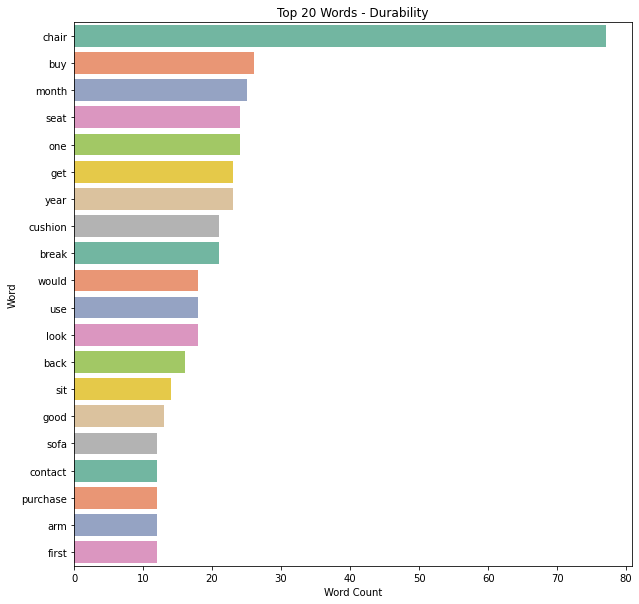

In [86]:
top20 = BOW_Durability.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Durability")

In [87]:
BOW_Durability.to_csv("Project Result/BOW_Durability.csv", index = False)

# BOW for label = Assembly or Installation

In [88]:
X_Assembly = df_reviews_Assembly["Latest Review Comment"]
X_bow_Assembly = vectorizer.fit_transform(X_Assembly)

In [89]:
count_df = pd.DataFrame(X_bow_Assembly.toarray(), columns=vectorizer.get_feature_names())

In [90]:
BOW_Assembly=count_df.T.sum(axis=1).reset_index().sort_values(by=0, ascending =False)

In [91]:
BOW_Assembly.columns=["Word", "Word Count"]

In [92]:
BOW_Assembly

,Word,Word Count
106,chair,83
214,easy,64
45,assemble,62
589,put,51
782,together,48
...,...,...
381,installation,1
383,internal,1
384,investigation,1
385,investment,1


In [93]:
BOW_Assembly.to_csv("Project Result/BOW_Assembly.csv", index = False)

C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Assembly')

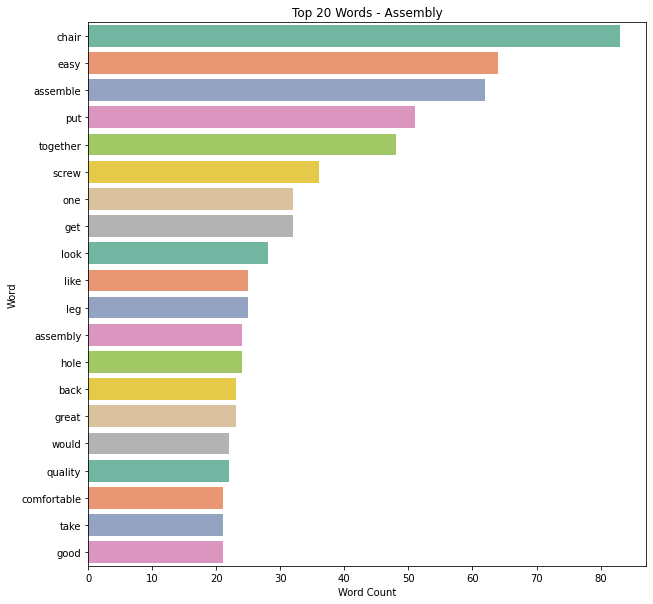

In [94]:
top20 = BOW_Assembly.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Assembly")

# BOW for label = Pricing/ Value of Money

In [95]:
X_Pricing = df_reviews_Pricing["Latest Review Comment"]
X_bow_Pricing = vectorizer.fit_transform(X_Pricing)

In [96]:
count_df = pd.DataFrame(X_bow_Pricing.toarray(), columns=vectorizer.get_feature_names())

In [97]:
BOW_Pricing=count_df.T.sum(axis=1).reset_index().sort_values(by=0, ascending =False)

In [98]:
BOW_Pricing.columns=["Word", "Word Count"]

In [99]:
BOW_Pricing

,Word,Word Count
68,chair,38
332,price,32
250,look,15
288,nice,15
242,like,14
...,...,...
201,hold,1
200,hindsight,1
199,hilfiger,1
196,heavy,1


In [100]:
BOW_Pricing.to_csv("Project Result/BOW_Pricing.csv", index = False)

C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Pricing')

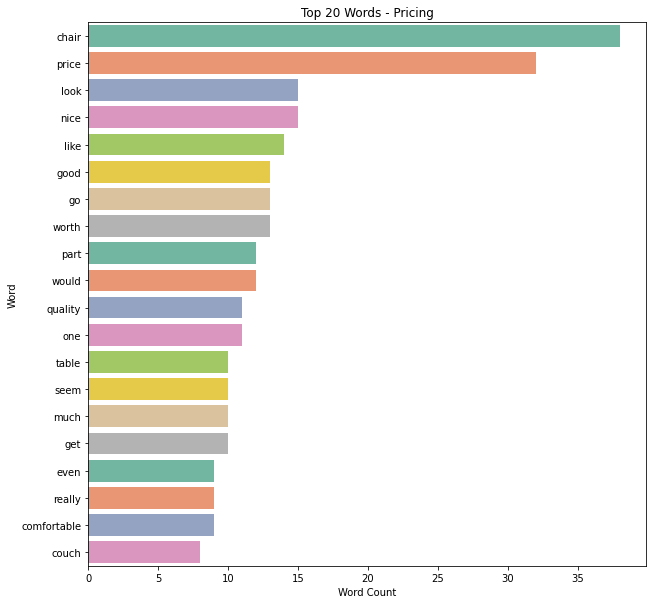

In [101]:
top20 = BOW_Pricing.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Pricing")

# BOW for label = Shipping/ Logistic/ Packaging

In [102]:
X_Shipping = df_reviews_Shipping["Latest Review Comment"]
X_bow_Shipping = vectorizer.fit_transform(X_Shipping)

In [103]:
count_df = pd.DataFrame(X_bow_Shipping.toarray(), columns=vectorizer.get_feature_names())

In [104]:
BOW_Shipping=count_df.T.sum(axis=1).reset_index().sort_values(by=0, ascending =False)

In [105]:
BOW_Shipping.columns=["Word", "Word Count"]

In [106]:
BOW_Shipping

,Word,Word Count
470,return,23
31,arrive,22
90,chair,22
69,break,19
66,box,18
...,...,...
363,next,1
360,neighbor,1
157,difficult,1
358,must,1


In [107]:
BOW_Shipping.to_csv("Project Result/BOW_Shipping.csv", index = False)

C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Shipping/ Packaging')

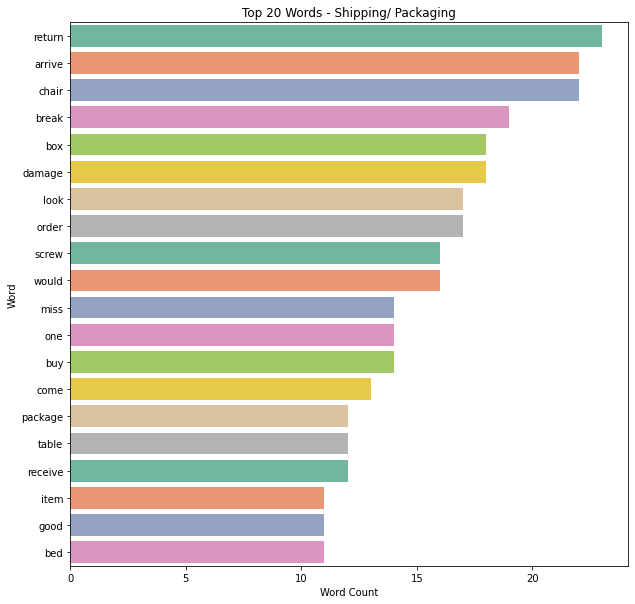

In [108]:
top20 = BOW_Shipping.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Shipping/ Packaging")

# TF-IDF

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
X = df_reviews["Latest Review Comment"]

In [111]:
# min_df= removing terms appear too infrequently
# min_df=0.01 means ignore term appear in less than 1% documnet

# max_df= removing terms appear too frequenty
# max_df=0.8 means ignore term appear in more than 80% documnet

tf_idf_vectorizer = TfidfVectorizer(tokenizer = token_filter, ngram_range=(1,2),min_df=0.01,max_df=0.9)
x_tfidf = tf_idf_vectorizer.fit_transform(X)

In [112]:
count_tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns=tf_idf_vectorizer.get_feature_names())

In [113]:
from itertools import islice
def take(n, iterable):
    return list(islice(iterable, n))
def topN(row, n):
    x = row.to_dict() # convert the input row to a dictionary
    x = {k: v for k, v in sorted(x.items(), key=lambda item: -item[1])} # sort the dictionary based on their values
    result = [k for k,v in take(n, x.items()) if v > 0] # extract the first n values from the dictionary
    return result
n = 10 #number of elements needed

In [114]:
import time
start_time = time.time()
df_reviews["keywords"] = count_tfidf_df.apply(lambda row: topN(row,n), axis =1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.16954612731933594 seconds ---


<ipython-input-114-7c15c31ff0a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["keywords"] = count_tfidf_df.apply(lambda row: topN(row,n), axis =1)


In [115]:
TFIDF_test=df_reviews[["Parent SKU","Listing Product Name","Label","Latest Review Rating","Latest Review Comment","keywords","Latest Review Date"]]

In [116]:
TFIDF_test.to_csv("Project Result/TFIDF.csv", index = False)

In [117]:
TFIDF_test[["Label","Latest Review Comment","keywords"]].sample(10).style.set_properties(subset=['Latest Review Comment','keywords'], **{'width': '500px'})

,Label,Latest Review Comment,keywords
404,Product Design (Function/ Comfortability/ Material),"Not real velvet, kind of disappointing. I did get it for my floor desk which has been ok, it is about 8 inches tall from the bottom of the seat up... I never attached the legs as it’s on the floor but yeah I was bummed that it wasn’t real velvet. Like why call it velvet, I don’t even know what to call this material ?? it’s kind of like microfiber I suppose? Also! The back of the seat is attached and has started to sag with time so that’s something to keep in mind... don’t think this chair is worth what I paid, but it could have cost more so ehh.","['kind', 'real', 'floor', 'attach', 'call', 'seat', 'ok', 'like', 'mind', 'suppose']"
451,Product Design (Function/ Comfortability/ Material),Bought this chair in pink and it stains easily. Have had it for almost a year and the cushion has sunken in. I catch myself leaning forward because there is minimal back support. I wouldn't recommend for anyone working normal business hours 5X days per week. Going to have to spend more $ on buying a new chair now,"['buy', 'stain', 'sink', 'back support', 'buy chair', 'almost', 'anyone', 'forward', 'week', 'would recommend']"
521,Product Design (Function/ Comfortability/ Material),"The height adjustment on the seat does not come up very far, also the lumbar does not adjust enough for us. The seat is comfortable, but it feels as though we are sitting just too low, even at its highest adjustment. AS I am typing my arms are reaching up to the keyboard instead of being even with the keyboard. It needs to come up another 3 to 4 inches. Just way too low for both of us!","['adjustment', 'u', 'even', 'low', 'doe', 'come', 'seat', 'adjust', 'type', 'instead']"
192,Product Design (Function/ Comfortability/ Material),This piece is perfect for our needs. We now have a place to neatly keep liquor etc so that it is accessible and looks good.,"['etc', 'look good', 'place', 'keep', 'piece', 'perfect', 'need', 'good', 'look']"
226,Shipping/ Logistic/ Packaging,"As hesitant as I usually am to buy a product of this price with no reviews online (and furniture, no less), I decided to just go for it with this item because it matches my decor so perfectly. Unfortunately, the box seemed pretty beat up, and the back of the piece is broken. This doesn’t interfere with the overall functionality, and at least it’s not in a glaringly noticeable location. I’m hoping I can cover it up with black wood adhesive paper. The only assembly that’s required is to screw in the legs. One of the screws isn’t securely in the leg, which will probably only be an issue if I need to move it later. For the price, I’m disappointed in the overall lack of quality. I think if would have been packaged a little more securely and not broken on arrival, I would have probably given it 4/5.","['probably', 'overall', 'screw', 'break', 'leg', 'price', 'decor', 'hop', 'online', 'least']"
210,Durability,"I am not happy with this bed ...it came with wood boards to hold up the mattress....these boards are very thin, 3 broke my first nite sleeping on my bed...this headboard and frame on this bed are heavy, to heavy for the thin wooden slats....something needs to be done asap.. .I had to purchase a metal platform , with is what should have came with my bed....someone need to Contact me Asap!!!!","['bed', 'heavy', 'come', 'need', 'slat', 'wooden', 'frame', 'someone', 'contact', 'metal']"
563,Assembly or Installation,Easy to put together,"['easy put', 'put together', 'together', 'put', 'easy']"
280,Shipping/ Logistic/ Packaging,Table arrived chipped!,"['chip', 'arrive', 'table']"
547,Product Design (Function/ Comfortability/ Material),"This chair has two levers, one to go up and down, and one to release the chair from the upright position to allow you to recline, it however, doesn't lock in any position but the upright, if you go to recline, YOU have to hold yourself in whatever angle of recline you desire, which isn't

# Model 1: Logistics Regression

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import pickle

In [119]:
lgr1 = LogisticRegression()
parameters = {'C':[0.1,1,3,5,10], "max_iter":[1,30,50,100,300], "penalty":["l2"],"solver":['newton-cg', "lbfgs", "liblinear", "sag", "saga"]}
cv1 = GridSearchCV(lgr1, parameters, cv=5)

In [120]:
y = df_reviews["Label_value"]

In [121]:
cv1.fit(x_tfidf.toarray(),y)

C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: ne

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 3, 5, 10],
                         'max_iter': [1, 30, 50, 100, 300], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [122]:
#cv1.cv_results_

In [123]:
cv1.best_params_

{'C': 10, 'max_iter': 30, 'penalty': 'l2', 'solver': 'sag'}

In [124]:
y = df_reviews["Label_value"]
X_train, X_test, y_train, y_test = train_test_split(x_tfidf.toarray(), y, test_size = 0.3, random_state=99, stratify=y)
lgr1 = LogisticRegression(**cv1.best_params_)
lgr1.fit(X_train, y_train)
y_pred_train =lgr1.predict(X_train)
y_pred_test =lgr1.predict(X_test)

C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [125]:
lgr1_train_acc_score=accuracy_score(y_train, y_pred_train)
lgr1_test_acc_score=accuracy_score(y_test, y_pred_test)

print("logistic Regression accuracy_score:")
print(f'Train model score:{lgr1_train_acc_score}')
print(f'Test model score:{lgr1_test_acc_score}')

logistic Regression accuracy_score:
Train model score:1.0
Test model score:0.7435897435897436


In [126]:
lgr1_confusion_matrix=confusion_matrix(y_test, y_pred_test)

print("logistic Regression confusion_matrix")
print()
print(lgr1_confusion_matrix)

logistic Regression confusion_matrix

[[98  0 11  1  2]
 [ 8  7  1  0  1]
 [ 6  0 28  1  0]
 [ 8  0  0  3  1]
 [ 9  1  0  0  9]]


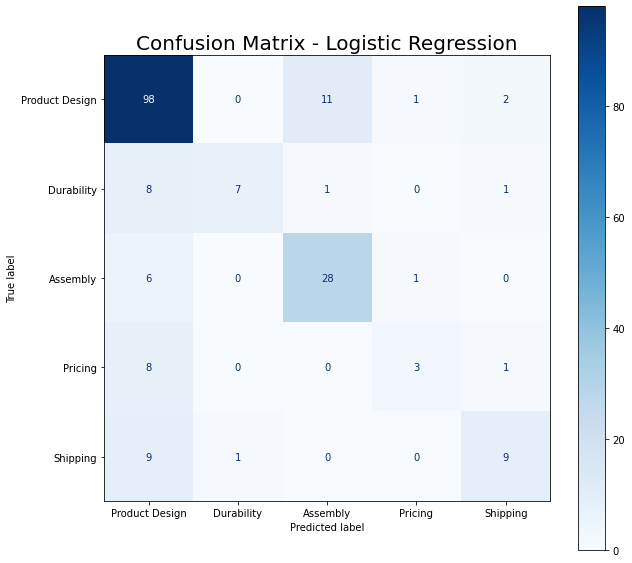

In [127]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm= confusion_matrix(np.arange(10),np.arange(10))
plot_lgr1_cm=ConfusionMatrixDisplay(confusion_matrix=lgr1_confusion_matrix) 
fig, ax = plt.subplots(figsize=(10,10))
plot_lgr1_cm.plot(ax=ax,cmap=plt.cm.Blues)
plot_lgr1_cm.ax_.set_title("Confusion Matrix - Logistic Regression",fontsize=20)
ax.xaxis.set_ticklabels(['Product Design', 'Durability','Assembly','Pricing','Shipping']); ax.yaxis.set_ticklabels(['Product Design', 'Durability','Assembly','Pricing','Shipping']);

In [128]:
Model_1_classification_report=classification_report(y_test, y_pred_test)

print("logistic Regression classification_report")
print()
print(Model_1_classification_report)

logistic Regression classification_report

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       112
           1       0.88      0.41      0.56        17
           2       0.70      0.80      0.75        35
           3       0.60      0.25      0.35        12
           4       0.69      0.47      0.56        19

    accuracy                           0.74       195
   macro avg       0.73      0.56      0.61       195
weighted avg       0.74      0.74      0.73       195



Product DesignLabel & Label value
- 0 = Product Design (Function/ Comfortability/ Material)
- 1 = Durability
- 2 = Assembly or Installation
- 3 = Pricing/ Value of Money
- 4 = Shipping/ Logistic/ Packaging

In [129]:
# Save Logistics Regression Model #1
with open("lgr1_wo_class_weight","wb") as f:
    pickle.dump(lgr1,f)

In [130]:
with open("lgr1_wo_class_weight","rb") as f:
    model1=pickle.load(f)

In [131]:
#model1.predict(X_train)

### 1st attemp in Logistic Regression is overfit (Training Acc = 1 and Test Acc = 0.71) due to imbalance dataset

# 2nd Model: Logistic Regression with class_weight

In [132]:
lgr2 = LogisticRegression()
parameters = {'C':[0.1,1,3,5,10], "max_iter":[1,30,50,100,300], "penalty":["l2"],"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],"class_weight":["balanced"]}
cv2 = GridSearchCV(lgr2, parameters, cv=5)

In [133]:
cv2.fit(x_tfidf.toarray(),y)

C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: ne

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 3, 5, 10], 'class_weight': ['balanced'],
                         'max_iter': [1, 30, 50, 100, 300], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [134]:
#cv2.cv_results_

In [135]:
cv2.best_params_

{'C': 3,
 'class_weight': 'balanced',
 'max_iter': 30,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [136]:
lgr2 = LogisticRegression(**cv2.best_params_)
lgr2.fit(X_train, y_train)
y_pred_train =lgr2.predict(X_train)
y_pred_test =lgr2.predict(X_test)

In [137]:
lgr2_train_acc_score=accuracy_score(y_train, y_pred_train)
lgr2_test_acc_score=accuracy_score(y_test, y_pred_test)

print("logistic Regression (class weight) accuracy_score:")
print(f'Train model score:{lgr2_train_acc_score}')
print(f'Test model score:{lgr2_test_acc_score}')

logistic Regression (class weight) accuracy_score:
Train model score:0.9469026548672567
Test model score:0.7076923076923077


In [138]:
lgr2_confusion_matrix=confusion_matrix(y_test, y_pred_test)

print("logistic Regression (class weight) confusion_matrix")
print()
print(lgr2_confusion_matrix)

logistic Regression (class weight) confusion_matrix

[[80  5 18  5  4]
 [ 5 10  1  0  1]
 [ 3  0 30  1  1]
 [ 3  0  2  5  2]
 [ 2  2  2  0 13]]


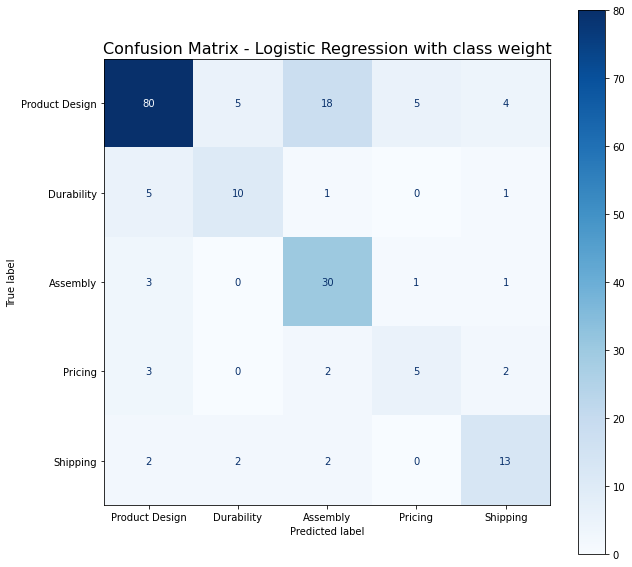

In [139]:
cm= confusion_matrix(np.arange(10),np.arange(10))
plot_lgr2_cm=ConfusionMatrixDisplay(confusion_matrix=lgr2_confusion_matrix) 
fig, ax = plt.subplots(figsize=(10,10))
plot_lgr2_cm.plot(ax=ax,cmap=plt.cm.Blues)
plot_lgr2_cm.ax_.set_title("Confusion Matrix - Logistic Regression with class weight",fontsize=16)
ax.xaxis.set_ticklabels(['Product Design', 'Durability','Assembly','Pricing','Shipping']); ax.yaxis.set_ticklabels(['Product Design', 'Durability','Assembly','Pricing','Shipping']);

In [140]:
lgr2_classification_report=classification_report(y_test, y_pred_test)

print("logistic Regression (class weight) classification_report")
print()
print(lgr2_classification_report)

logistic Regression (class weight) classification_report

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       112
           1       0.59      0.59      0.59        17
           2       0.57      0.86      0.68        35
           3       0.45      0.42      0.43        12
           4       0.62      0.68      0.65        19

    accuracy                           0.71       195
   macro avg       0.62      0.65      0.63       195
weighted avg       0.74      0.71      0.71       195



### Still Overfitting but better than Attemp 1
- Class_weight can improve result
- slight decrease on accuracy score to 71% (-3%)
- trade off: lower label 0, but rest labels improve
- Below labels has significant improvement 


In [141]:
# Save Logistics Regression Model #2
with open("lgr2_w_class_weight","wb") as f:
    pickle.dump(lgr2,f)

In [142]:
with open("lgr2_w_class_weight","rb") as f:
    model2=pickle.load(f)

In [143]:
lgr2.predict(X_train)

array([1, 0, 0, 0, 2, 3, 1, 1, 3, 3, 0, 1, 3, 0, 3, 0, 2, 0, 4, 0, 1, 0,
       2, 0, 0, 0, 4, 2, 0, 0, 2, 4, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1,
       4, 2, 3, 0, 0, 4, 2, 0, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 4, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 3, 2,
       0, 0, 0, 0, 4, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 4, 0, 1, 0, 0, 4, 2,
       2, 1, 2, 0, 0, 2, 0, 0, 4, 0, 4, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       3, 0, 1, 0, 4, 0, 3, 0, 0, 0, 0, 3, 3, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 4, 0, 2, 3, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 4,
       0, 4, 0, 4, 0, 0, 3, 2, 0, 0, 2, 0, 0, 0, 4, 3, 0, 2, 4, 0, 4, 4,
       4, 0, 0, 2, 2, 0, 0, 2, 4, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 4, 3, 1, 2, 3, 0, 2, 0, 3, 0, 0, 4, 4, 2, 4, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 0, 1, 2, 2, 2, 2, 1,

# SVM

In [144]:
from sklearn.svm import SVC

In [145]:
parameters = {'C':[0.1,1,3,5,10], "max_iter":[1,30,50,100,300], "gamma": ["scale","auto"],"max_iter":[1,30,50,100,300,500,1000], "kernel":["poly", "rbf","sigmoid"],"class_weight":["balanced"]}

In [146]:
SVM = SVC()

In [147]:
cv3 = GridSearchCV(SVM, parameters, cv=5).fit(x_tfidf.toarray(),y)

C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

In [148]:
#cv3.cv_results_

In [149]:
cv3.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 300}

In [150]:
SVM = SVC(**cv3.best_params_)
SVM.fit(X_train, y_train)
y_pred_train =SVM.predict(X_train)
y_pred_test =SVM.predict(X_test)

C:\Users\ethanchan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [151]:
svm_train_acc_score=accuracy_score(y_train, y_pred_train)
svm_test_acc_score=accuracy_score(y_test, y_pred_test)

print("SVM accuracy_score:")
print(f'Train model score:{svm_train_acc_score}')
print(f'Test model score:{svm_test_acc_score}')

SVM accuracy_score:
Train model score:0.9889380530973452
Test model score:0.6974358974358974


In [152]:
svm_confusion_matrix=confusion_matrix(y_test, y_pred_test)

print("SVM confusion_matrix")
print()
print(svm_confusion_matrix)

SVM confusion_matrix

[[101   0  10   0   1]
 [ 12   5   0   0   0]
 [ 12   0  23   0   0]
 [  9   0   1   2   0]
 [ 14   0   0   0   5]]


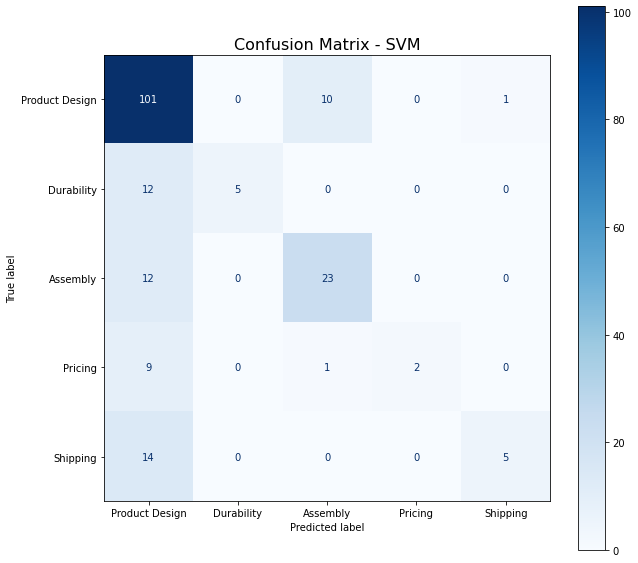

In [153]:
cm= confusion_matrix(np.arange(10),np.arange(10))
plot_svm_cm=ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix) 
fig, ax = plt.subplots(figsize=(10,10))
plot_svm_cm.plot(ax=ax,cmap=plt.cm.Blues)
plot_svm_cm.ax_.set_title("Confusion Matrix - SVM",fontsize=16)
ax.xaxis.set_ticklabels(['Product Design', 'Durability','Assembly','Pricing','Shipping']); ax.yaxis.set_ticklabels(['Product Design', 'Durability','Assembly','Pricing','Shipping']);

In [154]:
svm_classification_report=classification_report(y_test, y_pred_test)

print("SVM_classification_report")
print()
print(svm_classification_report)

SVM_classification_report

              precision    recall  f1-score   support

           0       0.68      0.90      0.78       112
           1       1.00      0.29      0.45        17
           2       0.68      0.66      0.67        35
           3       1.00      0.17      0.29        12
           4       0.83      0.26      0.40        19

    accuracy                           0.70       195
   macro avg       0.84      0.46      0.52       195
weighted avg       0.74      0.70      0.66       195



In [155]:
with open("svm","wb") as f:
    pickle.dump(SVM,f)

In [156]:
with open("svm","rb") as f:
    model3=pickle.load(f)

## SVM performanceis worse than logistic model
   - lower accuracy score & weighted f1 score
   - f1-score in all labels are lower

# Try XGBoost

In [157]:
#!pip install xgboost
import xgboost as xgb

In [158]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [159]:
# Simple Training Code

from sklearn.metrics import accuracy_score

bst = xgb.train({"objective": "multi:softmax", "num_class":5}, dtrain)
y_pred_test = bst.predict(dtest)
accuracy_score(y_test, y_pred_test)

[19:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6871794871794872

In [160]:
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.metrics import roc_auc_score, accuracy_score

param_dict = {"eta": [0.1,0.3,0.5,1],
             "objective":["multi:softmax"],
             "num_class" : [5],
             "gamma": [0,3,5],
             "max_depth":[3,5,10,15,30],
             "booster":["gbtree","dart"]}


#Init Variable
best_score = 0

for param in ParameterGrid(param_dict):
    #kf = KFold(n_splits=Kfold)
    #train_index, test_index in kf.split(X):
    #for loop the following:
    #X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    #Training
    bst = xgb.train(param, dtrain, num_boost_round=10)
    #Prediction
    y_pred_train = bst.predict(dtrain)
    y_pred_test = bst.predict(dtest)
    
    #Evaluate
    train_score = accuracy_score(y_train, y_pred_train)
    test_score = accuracy_score(y_test, y_pred_test)
    
    print("Accuracy Score: Train:{}, Test:{}".format(train_score, test_score))
    
    if test_score > best_score:
        best_score = test_score
        best_param = param
        train_score = train_score
        print("Train Score, Best Score and best para", train_score, best_score, best_param)

[19:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: Train:0.7986725663716814, Test:0.6358974358974359
Train Score, Best Score and best para 0.7986725663716814 0.6358974358974359 {'booster': 'gbtree', 'eta': 0.1, 'gamma': 0, 'max_depth': 3, 'num_class': 5, 'objective': 'multi:softmax'}
[19:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: Train:0.8606194690265486, Test:0.6512820512820513
Train Score, Best Score and best para 0.8606194690265486 0.65128

In [161]:
best_param

{'booster': 'gbtree',
 'eta': 1,
 'gamma': 0,
 'max_depth': 10,
 'num_class': 5,
 'objective': 'multi:softmax'}

In [162]:
best_score

0.7128205128205128

In [163]:
xg_cm=confusion_matrix(y_test, y_pred_test)

In [164]:
xg_cm

array([[95,  2, 12,  2,  1],
       [12,  4,  1,  0,  0],
       [13,  1, 21,  0,  0],
       [ 7,  1,  2,  2,  0],
       [11,  1,  4,  0,  3]], dtype=int64)

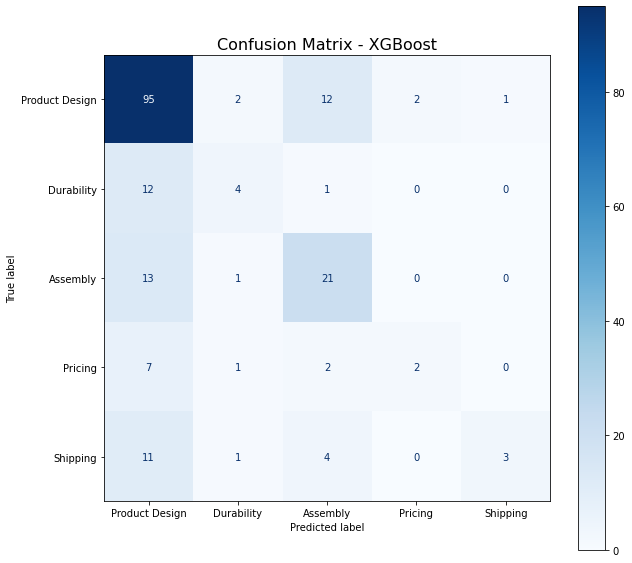

In [165]:
cm= confusion_matrix(np.arange(10),np.arange(10))
plot_xg_cm=ConfusionMatrixDisplay(confusion_matrix=xg_cm) 
fig, ax = plt.subplots(figsize=(10,10))
plot_xg_cm.plot(ax=ax,cmap=plt.cm.Blues)
plot_xg_cm.ax_.set_title("Confusion Matrix - XGBoost",fontsize=16)
ax.xaxis.set_ticklabels(['Product Design', 'Durability','Assembly','Pricing','Shipping']); ax.yaxis.set_ticklabels(['Product Design', 'Durability','Assembly','Pricing','Shipping']);

In [166]:
xg_classification_report=classification_report(y_test, y_pred_test)

print("XGBoost_classification_report")
print()
print(xg_classification_report)

XGBoost_classification_report

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       112
           1       0.44      0.24      0.31        17
           2       0.53      0.60      0.56        35
           3       0.50      0.17      0.25        12
           4       0.75      0.16      0.26        19

    accuracy                           0.64       195
   macro avg       0.58      0.40      0.43       195
weighted avg       0.63      0.64      0.60       195



## Load logistic regression with class weight

In [167]:
with open("lgr2_w_class_weight","rb") as f:
    model2=pickle.load(f)

In [168]:
y_pred =lgr2.predict(x_tfidf.toarray())

In [169]:
len(y_pred)

647

In [170]:
result=df_reviews

In [171]:
result

,Customer ID,Style,Parent SKU,Listing Product Name,Listing SKU,Avg Rating,Num Reviews,Latest Review Rating,Latest Review Comment,Latest Review Date,UpdateDate,Label,Label_value,keywords
0,AMAZ10,10HGQ,10HGQ,Dream Pro Restore 10 Inch Gel-Infused Queen Me...,B00RGICVIS,4.5,6.0,5.0,This is my third memory foam mattress and I re...,12/20/2015 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[room, memory, memory foam, long, take, really..."
1,AMAZ10,127700033,127700033,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y17K8CD,2.9,4.0,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[cause, move, uncomfortable, couch, much, cush..."
2,AMAZ10,127701533,127701533,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y19JZGK,2.9,5.0,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, stick, seat cushion, actually, think, s..."
3,AMAZ10,127711133,127711133,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y1B1B2T,3.5,9.0,5.0,This sofa is very sturdy and attractive. I lov...,2/5/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, direction, attractive, match, base, cov..."
4,AMAZ10,129701233,129701233,Serta Hemsley Contemporary Upholstered Sofa wi...,B06XPRXRJ4,2.9,4.0,1.0,Purchased 2 of these sofas. The foam cushions ...,4/21/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[foam, cushion, warranty, actually, cover, sof..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,AMAZ10,45833,45833,La-Z-Boy Delano Big & Tall Executive Office Ch...,B0116W5B5O,4.1,1557.0,1.0,I've had the chair for about 6 months. I'm hea...,12/21/2021 0:00,1/1/2022 0:00,Durability,1,"[lb, bend, manufacturer, read, heavy, contact,..."
643,AMAZ10,47925,47925,"Serta Leighton Home Office Memory Foam, Height...",B01IR8U42K,4.4,1604.0,1.0,Terrible quality. No memory foam anywhere in t...,12/25/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[describe, product, anywhere, memory, memory f..."
644,AMAZ10,CR43528PB,CR43528PB,"Serta Copenhagen 61"" Loveseat - Pillowed Back ...",B00EUU5JI4,3.4,2203.0,1.0,It looks great in the picture but it's NOT com...,12/30/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, matter, online, seem like, sit, pick, s..."
645,AMAZ10,FUTB10102A,FUTB10102A,Finch Lockwood Modern 2-Tier Wood Campaign Sid...,B07Q3V22SC,3.8,29.0,1.0,"Surface has multiple globs of wood filler, not...",7/27/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,[wood]


In [172]:
result["predict_label"]=y_pred

<ipython-input-172-4d97872e7871>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["predict_label"]=y_pred


In [173]:
result

,Customer ID,Style,Parent SKU,Listing Product Name,Listing SKU,Avg Rating,Num Reviews,Latest Review Rating,Latest Review Comment,Latest Review Date,UpdateDate,Label,Label_value,keywords,predict_label
0,AMAZ10,10HGQ,10HGQ,Dream Pro Restore 10 Inch Gel-Infused Queen Me...,B00RGICVIS,4.5,6.0,5.0,This is my third memory foam mattress and I re...,12/20/2015 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[room, memory, memory foam, long, take, really...",0
1,AMAZ10,127700033,127700033,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y17K8CD,2.9,4.0,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[cause, move, uncomfortable, couch, much, cush...",0
2,AMAZ10,127701533,127701533,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y19JZGK,2.9,5.0,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, stick, seat cushion, actually, think, s...",0
3,AMAZ10,127711133,127711133,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y1B1B2T,3.5,9.0,5.0,This sofa is very sturdy and attractive. I lov...,2/5/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, direction, attractive, match, base, cov...",2
4,AMAZ10,129701233,129701233,Serta Hemsley Contemporary Upholstered Sofa wi...,B06XPRXRJ4,2.9,4.0,1.0,Purchased 2 of these sofas. The foam cushions ...,4/21/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[foam, cushion, warranty, actually, cover, sof...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,AMAZ10,45833,45833,La-Z-Boy Delano Big & Tall Executive Office Ch...,B0116W5B5O,4.1,1557.0,1.0,I've had the chair for about 6 months. I'm hea...,12/21/2021 0:00,1/1/2022 0:00,Durability,1,"[lb, bend, manufacturer, read, heavy, contact,...",1
643,AMAZ10,47925,47925,"Serta Leighton Home Office Memory Foam, Height...",B01IR8U42K,4.4,1604.0,1.0,Terrible quality. No memory foam anywhere in t...,12/25/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[describe, product, anywhere, memory, memory f...",0
644,AMAZ10,CR43528PB,CR43528PB,"Serta Copenhagen 61"" Loveseat - Pillowed Back ...",B00EUU5JI4,3.4,2203.0,1.0,It looks great in the picture but it's NOT com...,12/30/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, matter, online, seem like, sit, pick, s...",0
645,AMAZ10,FUTB10102A,FUTB10102A,Finch Lockwood Modern 2-Tier Wood Campaign Sid...,B07Q3V22SC,3.8,29.0,1.0,"Surface has multiple globs of wood filler, not...",7/27/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,[wood],0


In [174]:
# apply numeric value to respresent label as Y for model training

result["Predict Label"]=result["predict_label"].apply(lambda x:  "Product Design (Function/ Comfortability/ Material)" if x ==0 else
                                                          ("Durability" if x == 1 else
                                                          ("Assembly or Installation" if x == 2 else
                                                          ("Pricing/ Value of Money" if x == 3 else "Shipping/ Logistic/ Packaging")))                                                                                                                     
                                                                 )

<ipython-input-174-f388c24f3251>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Predict Label"]=result["predict_label"].apply(lambda x:  "Product Design (Function/ Comfortability/ Material)" if x ==0 else


In [175]:
result

,Customer ID,Style,Parent SKU,Listing Product Name,Listing SKU,Avg Rating,Num Reviews,Latest Review Rating,Latest Review Comment,Latest Review Date,UpdateDate,Label,Label_value,keywords,predict_label,Predict Label
0,AMAZ10,10HGQ,10HGQ,Dream Pro Restore 10 Inch Gel-Infused Queen Me...,B00RGICVIS,4.5,6.0,5.0,This is my third memory foam mattress and I re...,12/20/2015 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[room, memory, memory foam, long, take, really...",0,Product Design (Function/ Comfortability/ Mate...
1,AMAZ10,127700033,127700033,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y17K8CD,2.9,4.0,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[cause, move, uncomfortable, couch, much, cush...",0,Product Design (Function/ Comfortability/ Mate...
2,AMAZ10,127701533,127701533,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y19JZGK,2.9,5.0,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, stick, seat cushion, actually, think, s...",0,Product Design (Function/ Comfortability/ Mate...
3,AMAZ10,127711133,127711133,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y1B1B2T,3.5,9.0,5.0,This sofa is very sturdy and attractive. I lov...,2/5/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, direction, attractive, match, base, cov...",2,Assembly or Installation
4,AMAZ10,129701233,129701233,Serta Hemsley Contemporary Upholstered Sofa wi...,B06XPRXRJ4,2.9,4.0,1.0,Purchased 2 of these sofas. The foam cushions ...,4/21/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[foam, cushion, warranty, actually, cover, sof...",0,Product Design (Function/ Comfortability/ Mate...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,AMAZ10,45833,45833,La-Z-Boy Delano Big & Tall Executive Office Ch...,B0116W5B5O,4.1,1557.0,1.0,I've had the chair for about 6 months. I'm hea...,12/21/2021 0:00,1/1/2022 0:00,Durability,1,"[lb, bend, manufacturer, read, heavy, contact,...",1,Durability
643,AMAZ10,47925,47925,"Serta Leighton Home Office Memory Foam, Height...",B01IR8U42K,4.4,1604.0,1.0,Terrible quality. No memory foam anywhere in t...,12/25/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[describe, product, anywhere, memory, memory f...",0,Product Design (Function/ Comfortability/ Mate...
644,AMAZ10,CR43528PB,CR43528PB,"Serta Copenhagen 61"" Loveseat - Pillowed Back ...",B00EUU5JI4,3.4,2203.0,1.0,It looks great in the picture but it's NOT com...,12/30/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, matter, online, seem like, sit, pick, s...",0,Product Design (Function/ Comfortability/ Mate...
645,AMAZ10,FUTB10102A,FUTB10102A,Finch Lockwood Modern 2-Tier Wood Campaign Sid...,B07Q3V22SC,3.8,29.0,1.0,"Surface has multiple globs of wood filler, not...",7/27/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,[wood],0,Product Design (Function/ Comfortability/ Mate...


In [176]:
result["correct"] = result["Label_value"] == result["predict_label"]

<ipython-input-176-0509a14dd793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["correct"] = result["Label_value"] == result["predict_label"]


In [177]:
result

,Customer ID,Style,Parent SKU,Listing Product Name,Listing SKU,Avg Rating,Num Reviews,Latest Review Rating,Latest Review Comment,Latest Review Date,UpdateDate,Label,Label_value,keywords,predict_label,Predict Label,correct
0,AMAZ10,10HGQ,10HGQ,Dream Pro Restore 10 Inch Gel-Infused Queen Me...,B00RGICVIS,4.5,6.0,5.0,This is my third memory foam mattress and I re...,12/20/2015 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[room, memory, memory foam, long, take, really...",0,Product Design (Function/ Comfortability/ Mate...,True
1,AMAZ10,127700033,127700033,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y17K8CD,2.9,4.0,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[cause, move, uncomfortable, couch, much, cush...",0,Product Design (Function/ Comfortability/ Mate...,True
2,AMAZ10,127701533,127701533,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y19JZGK,2.9,5.0,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, stick, seat cushion, actually, think, s...",0,Product Design (Function/ Comfortability/ Mate...,True
3,AMAZ10,127711133,127711133,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y1B1B2T,3.5,9.0,5.0,This sofa is very sturdy and attractive. I lov...,2/5/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, direction, attractive, match, base, cov...",2,Assembly or Installation,False
4,AMAZ10,129701233,129701233,Serta Hemsley Contemporary Upholstered Sofa wi...,B06XPRXRJ4,2.9,4.0,1.0,Purchased 2 of these sofas. The foam cushions ...,4/21/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[foam, cushion, warranty, actually, cover, sof...",0,Product Design (Function/ Comfortability/ Mate...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,AMAZ10,45833,45833,La-Z-Boy Delano Big & Tall Executive Office Ch...,B0116W5B5O,4.1,1557.0,1.0,I've had the chair for about 6 months. I'm hea...,12/21/2021 0:00,1/1/2022 0:00,Durability,1,"[lb, bend, manufacturer, read, heavy, contact,...",1,Durability,True
643,AMAZ10,47925,47925,"Serta Leighton Home Office Memory Foam, Height...",B01IR8U42K,4.4,1604.0,1.0,Terrible quality. No memory foam anywhere in t...,12/25/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[describe, product, anywhere, memory, memory f...",0,Product Design (Function/ Comfortability/ Mate...,True
644,AMAZ10,CR43528PB,CR43528PB,"Serta Copenhagen 61"" Loveseat - Pillowed Back ...",B00EUU5JI4,3.4,2203.0,1.0,It looks great in the picture but it's NOT com...,12/30/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, matter, online, seem like, sit, pick, s...",0,Product Design (Function/ Comfortability/ Mate...,True
645,AMAZ10,FUTB10102A,FUTB10102A,Finch Lockwood Modern 2-Tier Wood Campaign Sid...,B07Q3V22SC,3.8,29.0,1.0,"Surface has multiple globs of wood filler, not...",7/27/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,[wood],0,Product Design (Function/ Comfortability/ Mate...,True


In [178]:
# Split to correct prediction and incorrect prediction
result_correct=result.loc[result["correct"] == True]
result_incorrect=result.loc[result["correct"] == False]

In [200]:
# One table for each label
result_correct_Product_Design=result_correct.loc[result_correct["Label_value"]==0]
result_correct_Durability=result_correct.loc[result_correct["Label_value"]==1]
result_correct_Assembly=result_correct.loc[result_correct["Label_value"]==2]
result_correct_Pricing=result_correct.loc[result_correct["Label_value"]==3]
result_correct_Shipping=result_correct.loc[result_correct["Label_value"]==4]

In [217]:
result_correct_Product_Design.to_csv('Project Result/result_correct_Product_Design.csv') 
result_correct_Durability.to_csv('Project Result/result_correct_Durability.csv')  
result_correct_Assembly.to_csv('Project Result/result_correct_Assembly.csv')  
result_correct_Pricing.to_csv('Project Result/result_correct_Pricing.csv')  
result_correct_Shipping.to_csv('Project Result/result_correct_Shipping.csv') 

In [ ]:
result_incorrect

In [201]:
# One table for each label
result_incorrect_Product_Design=result_incorrect.loc[result_incorrect["Label_value"]==0]
result_incorrect_Durability=result_incorrect.loc[result_incorrect["Label_value"]==1]
result_incorrect_Assembly=result_incorrect.loc[result_incorrect["Label_value"]==2]
result_incorrect_Pricing=result_incorrect.loc[result_incorrect["Label_value"]==3]
result_incorrect_Shipping=result_incorrect.loc[result_incorrect["Label_value"]==4]

In [218]:
result_incorrect_Product_Design.to_csv('Project Result/result_incorrect_Product_Design.csv') 
result_incorrect_Durability.to_csv('Project Result/result_incorrect_Durability.csv')  
result_incorrect_Assembly.to_csv('Project Result/result_incorrect_Assembly.csv')  
result_incorrect_Pricing.to_csv('Project Result/result_incorrect_Pricing.csv')  
result_incorrect_Shipping.to_csv('Project Result/result_incorrect_Shipping.csv') 

# Compare X test and X Train keywords

In [219]:
df_reviews

,Customer ID,Style,Parent SKU,Listing Product Name,Listing SKU,Avg Rating,Num Reviews,Latest Review Rating,Latest Review Comment,Latest Review Date,UpdateDate,Label,Label_value,keywords,predict_label,Predict Label,correct
0,AMAZ10,10HGQ,10HGQ,Dream Pro Restore 10 Inch Gel-Infused Queen Me...,B00RGICVIS,4.5,6.0,5.0,This is my third memory foam mattress and I re...,12/20/2015 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[room, memory, memory foam, long, take, really...",0,Product Design (Function/ Comfortability/ Mate...,True
1,AMAZ10,127700033,127700033,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y17K8CD,2.9,4.0,3.0,The cushions move too much causing the couch t...,7/1/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[cause, move, uncomfortable, couch, much, cush...",0,Product Design (Function/ Comfortability/ Mate...,True
2,AMAZ10,127701533,127701533,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y19JZGK,2.9,5.0,1.0,I should have listened to the reviews...this s...,8/10/2019 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, stick, seat cushion, actually, think, s...",0,Product Design (Function/ Comfortability/ Mate...,True
3,AMAZ10,127711133,127711133,"Serta Colton 85"" Upholstered Living Room Sofa ...",B06Y1B1B2T,3.5,9.0,5.0,This sofa is very sturdy and attractive. I lov...,2/5/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, direction, attractive, match, base, cov...",2,Assembly or Installation,False
4,AMAZ10,129701233,129701233,Serta Hemsley Contemporary Upholstered Sofa wi...,B06XPRXRJ4,2.9,4.0,1.0,Purchased 2 of these sofas. The foam cushions ...,4/21/2020 0:00,2/13/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[foam, cushion, warranty, actually, cover, sof...",0,Product Design (Function/ Comfortability/ Mate...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,AMAZ10,45833,45833,La-Z-Boy Delano Big & Tall Executive Office Ch...,B0116W5B5O,4.1,1557.0,1.0,I've had the chair for about 6 months. I'm hea...,12/21/2021 0:00,1/1/2022 0:00,Durability,1,"[lb, bend, manufacturer, read, heavy, contact,...",1,Durability,True
643,AMAZ10,47925,47925,"Serta Leighton Home Office Memory Foam, Height...",B01IR8U42K,4.4,1604.0,1.0,Terrible quality. No memory foam anywhere in t...,12/25/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[describe, product, anywhere, memory, memory f...",0,Product Design (Function/ Comfortability/ Mate...,True
644,AMAZ10,CR43528PB,CR43528PB,"Serta Copenhagen 61"" Loveseat - Pillowed Back ...",B00EUU5JI4,3.4,2203.0,1.0,It looks great in the picture but it's NOT com...,12/30/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,"[sofa, matter, online, seem like, sit, pick, s...",0,Product Design (Function/ Comfortability/ Mate...,True
645,AMAZ10,FUTB10102A,FUTB10102A,Finch Lockwood Modern 2-Tier Wood Campaign Sid...,B07Q3V22SC,3.8,29.0,1.0,"Surface has multiple globs of wood filler, not...",7/27/2021 0:00,1/1/2022 0:00,Product Design (Function/ Comfortability/ Mate...,0,[wood],0,Product Design (Function/ Comfortability/ Mate...,True


In [220]:
#from sklearn.model_selection import train_test_split

X = df_reviews.drop(columns=["Label_value"])
y = df_reviews["Label_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=99, stratify=y)

In [221]:
# Extract X_train keywords
X_train_words=X_train["keywords"].tolist()
X_train_words_list = []
X_train_unique_keywords = []

for item in X_train_words:
    X_train_words_list.append(item[0].split(","))
    
for item in X_train_words_list:
    # appending elements to the flat_list
    X_train_unique_keywords += item    

# Convert to set
Unique_X_train_keywords=set(X_train_unique_keywords)

In [222]:
dataframe=pd.DataFrame(Unique_X_train_keywords)
dataframe.to_csv('X_train_keywords.csv')

In [223]:
# Extract X_test keywords
X_test_words=X_test["keywords"].tolist()
X_test_words_list = []
X_test_unique_keywords = []

for item in X_test_words:
    X_test_words_list.append(item[0].split(","))
    
for item in X_test_words_list:
    # appending elements to the flat_list
    X_test_unique_keywords += item
    
# Convert to set
Unique_X_test_keywords=set(X_test_unique_keywords)    

In [224]:
dataframe=pd.DataFrame(Unique_X_test_keywords)
dataframe.to_csv('X_test_keywords.csv')

In [225]:
different_keywords = Unique_X_train_keywords.difference(Unique_X_test_keywords)
same_keywords = Unique_X_train_keywords.intersection(Unique_X_test_keywords)

In [226]:
num_X_train_words=len(Unique_X_train_keywords)
num_X_test_words=len(Unique_X_test_keywords)
Num_diff_words=len(different_keywords)
Num_same_words=len(same_keywords)
same_word_pcent=len(same_keywords)/len(Unique_X_train_keywords)

In [227]:
print(f'# of X train Keywords= {num_X_train_words}')
print(f'# of X test Keywords = {num_X_test_words}')
print(f'Only {Num_same_words} keywords in both dataset' +', only '+'{:,.1%}'.format(same_word_pcent) )
print(f'{Num_diff_words} keywords are different word')

# of X train Keywords= 277
# of X test Keywords = 153
Only 89 keywords in both dataset, only 32.1%
188 keywords are different word


# Product_Design Keywords

In [295]:
df_reviews_Product_Design= df_reviews.loc[df_reviews["Label"]=="Product Design (Function/ Comfortability/ Material)"]

In [296]:
X_Product_Design = df_reviews_Product_Design.drop(columns=["Label_value"])
y_Product_Design = df_reviews_Product_Design["Label_value"]

In [297]:
# Extract X_train keywords
X_Product_Design_words=X_Product_Design["keywords"].tolist()
X_Product_Design_words_list = []
X_Product_Design_keywords_list = []

for item in X_Product_Design_words:
    X_Product_Design_words_list.append(item[0].split(","))
    
for item in X_Product_Design_words_list:
    # appending elements to the flat_list
    X_Product_Design_keywords_list += item    

In [ ]:
X_Product_Design_keywords_list

In [299]:
df_Product_Design_keywords_list = pd.DataFrame(X_Product_Design_keywords_list)

In [300]:
df_Product_Design_keywords_list.columns=['word']

In [309]:
df_count=df_Product_Design_keywords_list['word'].value_counts().reset_index()
df_count.columns=["Word", "Word Count"]

In [310]:
df_count

,Word,Word Count
0,chair,17
1,couch,12
2,sofa,10
3,love,6
4,cushion,5
...,...,...
231,appear,1
232,highly,1
233,sit chair,1
234,chair chair,1


C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Product Design (tf-idf)')

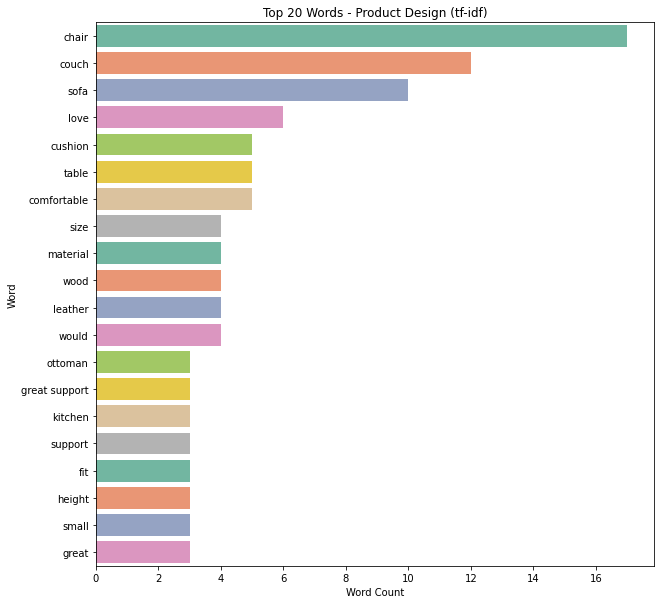

In [318]:
top10=df_count.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top10, palette="Set2").set_title("Top 20 Words - Product Design (tf-idf)")

## Durability

In [354]:
df_reviews_Durability= df_reviews.loc[df_reviews["Label"]=="Durability"]

In [355]:
X_Durability = df_reviews_Durability.drop(columns=["Label_value"])
y_Durability = df_reviews_Durability["Label_value"]

In [356]:
# Extract X_train keywords
X_Durability_words=X_Durability["keywords"].tolist()
X_Durability_words_list = []
X_Durability_keywords_list = []

for item in X_Durability_words:
    X_Durability_words_list.append(item[0].split(","))
    
for item in X_Durability_words_list:
    # appending elements to the flat_list
    X_Durability_keywords_list += item    

In [357]:
X_Durability_keywords_list

['flat',
 'seat',
 'loose',
 'manufacturer',
 'service',
 'year',
 'new',
 'basically',
 'chair look',
 'gift',
 'warranty',
 'pad',
 'really',
 'cat',
 'would buy',
 'couch',
 'fell',
 'break',
 'cheap',
 'bed',
 'bed',
 'adjust',
 'husband',
 'inch',
 'couch',
 'frame',
 'ok',
 'back cushion',
 'sofa',
 'pretty',
 'u',
 'love chair',
 'chair',
 'stick',
 'seat',
 'good support',
 'bolt',
 'defect',
 'chair would',
 'chair last',
 'quite',
 'yet',
 'contact',
 'get',
 'even',
 'buy',
 'one',
 'cushion',
 'already',
 'seat',
 'time',
 'chip',
 'sink',
 'seller',
 'leather',
 'use chair',
 'lb']

In [358]:
df_Durability_keywords_list = pd.DataFrame(X_Durability_keywords_list)

In [359]:
df_Durability_keywords_list.columns=['word']

In [360]:
df_Durability_keywords_list

,word
0,flat
1,seat
2,loose
3,manufacturer
4,service
5,year
6,new
7,basically
8,chair look
9,gift


In [361]:
df_count2=df_Durability_keywords_list['word'].value_counts().reset_index()
df_count2.columns=["Word", "Word Count"]

In [362]:
df_count2

,Word,Word Count
0,seat,3
1,bed,2
2,couch,2
3,would buy,1
4,break,1
5,pad,1
6,new,1
7,frame,1
8,warranty,1
9,seller,1


C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Durability (tf-idf)')

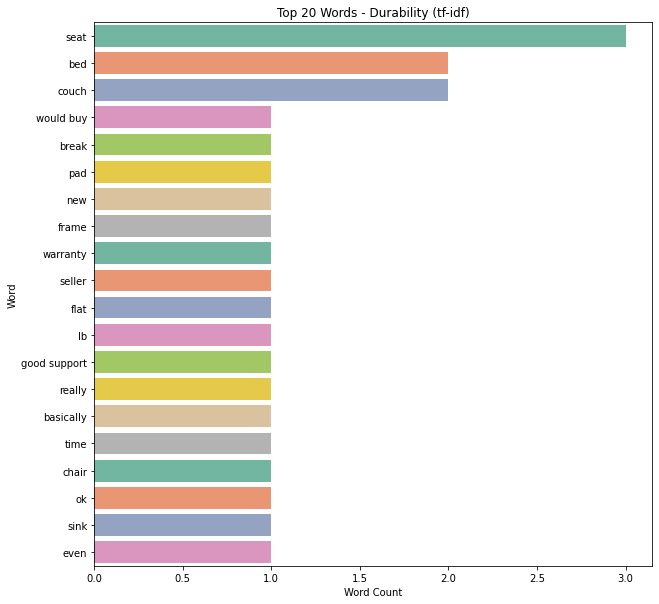

In [364]:
top20=df_count2.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Durability (tf-idf)")

## Assembly or Installation

In [365]:
df_reviews_Assembly= df_reviews.loc[df_reviews["Label"]=="Assembly or Installation"]

In [366]:
X_Assembly = df_reviews_Assembly.drop(columns=["Label_value"])
y_Assembly = df_reviews_Assembly["Label_value"]

In [367]:
# Extract X_train keywords
X_Assembly_words=X_Assembly["keywords"].tolist()
X_Assembly_words_list = []
X_Assembly_keywords_list = []

for item in X_Assembly_words:
    X_Assembly_words_list.append(item[0].split(","))
    
for item in X_Assembly_words_list:
    # appending elements to the flat_list
    X_Assembly_keywords_list += item    

In [ ]:
X_Assembly_keywords_list

In [369]:
df_Assembly_keywords_list = pd.DataFrame(X_Assembly_keywords_list)

In [370]:
df_Assembly_keywords_list.columns=['word']

In [371]:
df_Assembly_keywords_list

,word
0,day
1,instruction
2,comfortable sit
3,bolt
4,great chair
...,...
112,real
113,chair
114,chair
115,though


In [372]:
df_count3=df_Assembly_keywords_list['word'].value_counts().reset_index()
df_count3.columns=["Word", "Word Count"]

In [373]:
df_count3

,Word,Word Count
0,great chair,4
1,chair,4
2,easy put,4
3,screw,3
4,easy assemble,3
...,...,...
85,come,1
86,price,1
87,really nice,1
88,instruction,1


C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Assembly (tf-idf)')

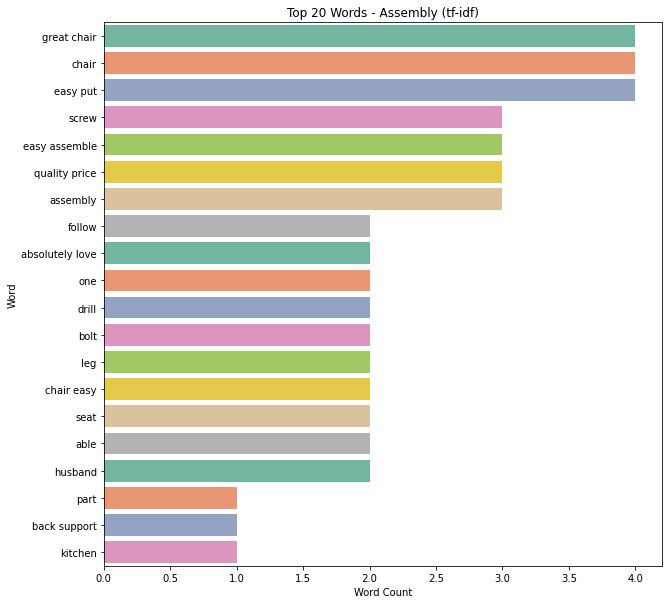

In [374]:
top20=df_count3.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Assembly (tf-idf)")

## Pricing/ Value of Money

In [375]:
df_reviews_Pricing= df_reviews.loc[df_reviews["Label"]=="Pricing/ Value of Money"]

In [376]:
X_Pricing = df_reviews_Pricing.drop(columns=["Label_value"])
y_Pricing = df_reviews_Pricing["Label_value"]

In [377]:
# Extract X_train keywords
X_Pricing_words=X_Pricing["keywords"].tolist()
X_Pricing_words_list = []
X_Pricing_keywords_list = []

for item in X_Pricing_words:
    X_Pricing_words_list.append(item[0].split(","))
    
for item in X_Pricing_words_list:
    # appending elements to the flat_list
    X_Pricing_keywords_list += item    

In [378]:
X_Pricing_keywords_list

['chair good',
 'offer',
 'much',
 'cost',
 'modern',
 'paint',
 'store',
 'finish',
 'honestly',
 'part',
 'suppose',
 'comfy',
 'shelf',
 'good',
 'beautiful',
 'drawer',
 'really',
 'super',
 'table',
 'small',
 'table',
 'bend',
 'slightly',
 'level',
 'quality price',
 'good quality',
 'perfect',
 'neutral',
 'couch',
 'anywhere',
 'couch',
 'people',
 'best',
 'go',
 'price',
 'recline',
 'much',
 'cost',
 'well']

In [379]:
df_Pricing_keywords_list = pd.DataFrame(X_Pricing_keywords_list)

In [380]:
df_Pricing_keywords_list.columns=['word']

In [381]:
df_Pricing_keywords_list

,word
0,chair good
1,offer
2,much
3,cost
4,modern
5,paint
6,store
7,finish
8,honestly
9,part


In [382]:
df_count4=df_Pricing_keywords_list['word'].value_counts().reset_index()
df_count4.columns=["Word", "Word Count"]

In [383]:
df_count4

,Word,Word Count
0,table,2
1,much,2
2,couch,2
3,cost,2
4,people,1
5,drawer,1
6,shelf,1
7,well,1
8,anywhere,1
9,suppose,1


C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Pricing (tf-idf)')

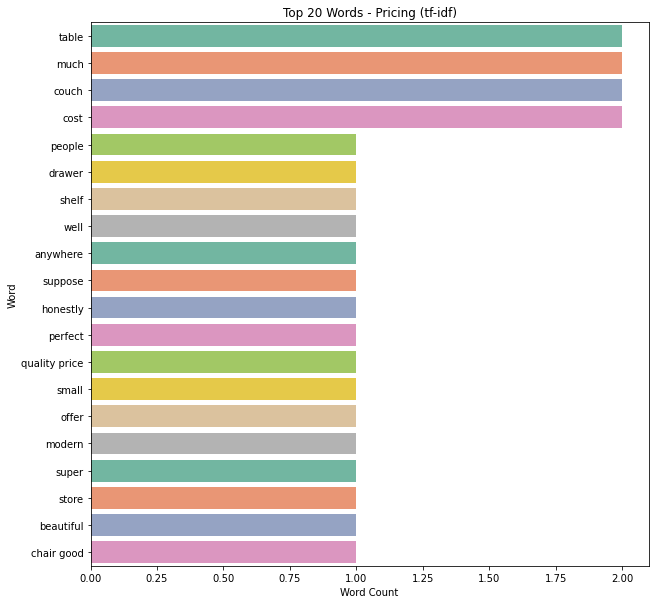

In [384]:
top20=df_count4.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Pricing (tf-idf)")

## Shipping/ Logistic/ Packaging

In [385]:
df_reviews_Shipping= df_reviews.loc[df_reviews["Label"]=="Shipping/ Logistic/ Packaging"]

In [386]:
X_Shipping = df_reviews_Shipping.drop(columns=["Label_value"])
y_Shipping = df_reviews_Shipping["Label_value"]

In [387]:
# Extract X_train keywords
X_Shipping_words=X_Shipping["keywords"].tolist()
X_Shipping_words_list = []
X_Shipping_keywords_list = []

for item in X_Shipping_words:
    X_Shipping_words_list.append(item[0].split(","))
    
for item in X_Shipping_words_list:
    # appending elements to the flat_list
    X_Shipping_keywords_list += item    

In [388]:
X_Shipping_keywords_list

['second',
 'construction',
 'shelf',
 'seller',
 'price',
 'chair',
 'purchase',
 'couch',
 'arrive',
 'ottoman',
 'center',
 'wooden',
 'delivery',
 'delivery',
 'delivery',
 'several',
 'slat',
 'really',
 'send back',
 'frame',
 'order',
 'screw',
 'design',
 'slat',
 'product',
 'probably',
 'corner',
 'drawer',
 'break',
 'arrive',
 'arrive',
 'scratch',
 'order',
 'scratch',
 'corner',
 'chip',
 'desk',
 'wo',
 'table',
 'twice',
 'chip',
 'properly',
 'package',
 'seem like',
 'arrive',
 'tear',
 'arrive',
 'call',
 'without',
 'gray',
 'paint',
 'gray',
 'head',
 'process',
 'box',
 'black',
 'hardware',
 'house',
 'replacement',
 'follow',
 'sofa',
 'call']

In [389]:
df_Shipping_keywords_list = pd.DataFrame(X_Shipping_keywords_list)

In [390]:
df_Shipping_keywords_list.columns=['word']

In [391]:
df_Shipping_keywords_list

,word
0,second
1,construction
2,shelf
3,seller
4,price
...,...
57,house
58,replacement
59,follow
60,sofa


In [392]:
df_count5=df_Shipping_keywords_list['word'].value_counts().reset_index()
df_count5.columns=["Word", "Word Count"]

In [393]:
df_count5

,Word,Word Count
0,arrive,5
1,delivery,3
2,scratch,2
3,order,2
4,corner,2
5,gray,2
6,slat,2
7,call,2
8,chip,2
9,design,1


C:\Users\ethanchan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words - Shipping (tf-idf)')

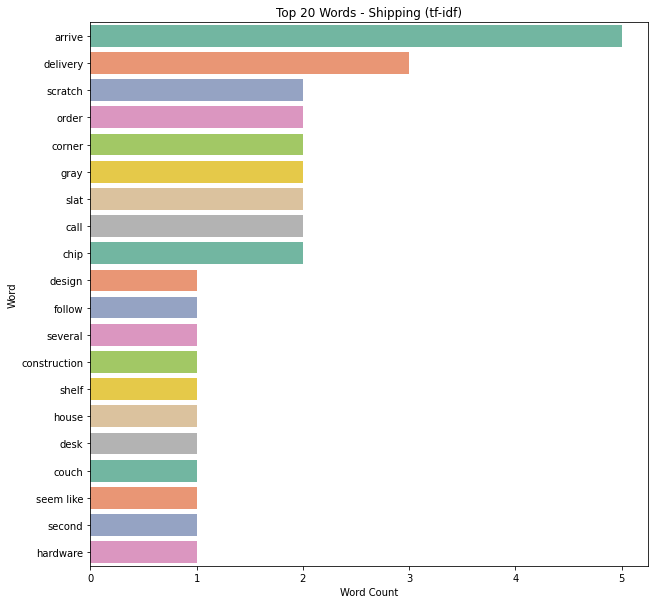

In [394]:
top20=df_count5.iloc[0:20]
plt.figure(figsize=(10,10))
sns.barplot("Word Count","Word", data=top20, palette="Set2").set_title("Top 20 Words - Shipping (tf-idf)")